In [49]:
#Subject:0414作業
#Author:王暄昀
#Date:2020/05/02
#Description:利用函式算出測站的Back_Azimuth及取出測站及地震波資料，轉成ZRT方向，利用GMT畫出波形及洛夫波的particle motion。

In [1]:
from obspy import read, read_inventory
import numpy as np
%matplotlib inline
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
#建立函式d_a_baz_cal，輸入地震及測站的經緯，輸出Delta,Azimuth,Back_Azimuth
def d_a_baz_cal(latE,lonE,latS,lonS):
    colatE = 90-(latE)
    colatS = 90-(latS)
    X = np.cos(colatE*np.pi/180)*np.cos(colatS*np.pi/180)+np.sin(colatE*np.pi/180)*np.sin(colatS*np.pi/180)*np.cos((lonS-lonE)*np.pi/180)
    Delta = np.arccos(X) * 180/np.pi
    
    YY = np.sin(colatS*np.pi/180)*np.sin((lonS-lonE)*np.pi/180)
    XX = np.cos(colatS*np.pi/180)*np.sin(colatE*np.pi/180)-np.sin(colatS*np.pi/180)*np.cos(colatE*np.pi/180)*np.cos((lonS-lonE)*np.pi/180)
    Azimuth = np.arctan(YY/XX) * 180 / np.pi
    
    YY = np.sin(colatE*np.pi/180)*np.sin((lonE-lonS)*np.pi/180)
    XX = np.cos(colatE*np.pi/180)*np.sin(colatS*np.pi/180)-np.sin(colatE*np.pi/180)*np.cos(colatS*np.pi/180)*np.cos((lonE-lonS)*np.pi/180)
    Back_Azimuth = np.arctan(YY/XX) * 180 / np.pi + 180
    
    return Delta,Azimuth,Back_Azimuth

# 建立函式NE_to_RT，輸入地震、測站資料及Back_Azimuth，輸出轉向後的資料(NEZ轉為RTZ)
def NE_to_RT(E,S,baz):
    st2 = read(E,format="MSEED")
    st1 = st2.copy()
    inv = read_inventory(S)
    st2.rotate(method="NE->RT", inventory=inv, back_azimuth=baz)
    return st1,st2

In [3]:
# 建立函式write_waveform，可讀取測站資料並存成txt檔
def write_waveform(st1):
    x = np.arange(0,len(st1[2].data))/st1[2].stats.sampling_rate
    for i in st1:
        if i.stats.channel[-1]=="R":
            tmp=np.vstack((x,i.data[0:218400])).T
            np.savetxt("R.txt",tmp,delimiter=" ")
            print("Write Radial data ... Genterating R.txt ...")
    
        if i.stats.channel[-1]=="T":
            tmp=np.vstack((x,i.data[0:218400])).T
            np.savetxt("T.txt",tmp,delimiter=" ")
            print("Write Transverse data ... Genterating T.txt ...")
    
        if i.stats.channel[-1]=="Z":
            tmp=np.vstack((x,i.data)).T
            np.savetxt("Z.txt",tmp,delimiter=" ")
            print("Write Vertical data ... Genterating Z.txt ...")
            
        if i.stats.channel[-1]=="N":
            tmp=np.vstack((x,i.data[0:218400])).T
            np.savetxt("N.txt",tmp,delimiter=" ")
            print("Write North-South data ... Genterating  N.txt ...")
            
        if i.stats.channel[-1]=="E":
            tmp=np.vstack((x,i.data[0:218400])).T
            np.savetxt("E.txt",tmp,delimiter=" ")
            print("Write East-West data ... Genterating E.txt ...")

            

In [4]:
# 輸入地震及測站的經緯到函式
latE = -60.37
lonE = 46.58
latS = 29.33
lonS = -103.67
d_a_baz_cal(latE,lonE,latS,lonS)


(143.1299448275344, 46.13798192093574, 155.86559831313457)

In [5]:
# 將地震、測站資料及Back_Azimuth輸入函式
st1,st2 = NE_to_RT("2013-11-17-mw78-scotia-sea.miniseed","fdsn-station_2020-04-21T04_26_12.xml",155.86559831313457)

C:\ProgramData\Anaconda3\lib\site-packages\obspy\io\stationxml\core.py:84: UserWarning: The StationXML file has version 1.1, ObsPy can deal with version 1.0. Proceed with caution.
  root.attrib["schemaVersion"], SCHEMA_VERSION))
C:\ProgramData\Anaconda3\lib\site-packages\obspy\signal\headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)


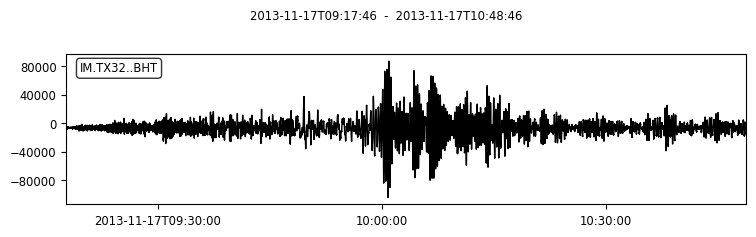

In [6]:
st2[0].plot()

In [14]:
np.cos(155.86559831313457*np.pi/180)*(-5887)-np.sin(155.86559831313457*np.pi/180)*(-4828)

7346.475780011819

In [15]:
np.sin(155.86559831313457*np.pi/180)*(-5887)+np.cos(155.86559831313457*np.pi/180)*(-4828)

1998.9113571391172

In [9]:
st2[1][1000]

-1386.6969498255257

In [18]:
st2[0]

IM.TX32..BHT | 2013-11-17T09:17:46.000000Z - 2013-11-17T10:48:46.000000Z | 40.0 Hz, 218401 samples

In [11]:
st2[1]

IM.TX32..BHR | 2013-11-17T09:17:46.000000Z - 2013-11-17T10:48:46.000000Z | 40.0 Hz, 218401 samples

In [12]:
st1[1]

IM.TX32..BHN | 2013-11-17T09:17:46.000000Z - 2013-11-17T10:48:46.000000Z | 40.0 Hz, 218401 samples

In [23]:
st2[1][100]

-1998.9113571391172

In [24]:
st2[2][100]

-635

In [16]:
# 輸入測站資料到函式，寫出txt檔
write_waveform(st1)
write_waveform(st2)

Write East-West data ... Genterating E.txt ...
Write North-South data ... Genterating  N.txt ...
Write Vertical data ... Genterating Z.txt ...
Write Transverse data ... Genterating T.txt ...
Write Radial data ... Genterating R.txt ...
Write Vertical data ... Genterating Z.txt ...


In [7]:
#從txt檔中取資料
E=np.genfromtxt("E.txt",delimiter=" ",dtype=[("x",np.float32),("E",np.float32)])
N=np.genfromtxt("N.txt",delimiter=" ",dtype=[("x",np.float32),("N",np.float32)])
Z=np.genfromtxt("Z.txt",delimiter=" ",dtype=[("x",np.float32),("Z",np.float32)])
T=np.genfromtxt("T.txt",delimiter=" ",dtype=[("x",np.float32),("T",np.float32)])
R=np.genfromtxt("R.txt",delimiter=" ",dtype=[("x",np.float32),("R",np.float32)])

In [8]:
# 寫出bat檔繪製ZNE的地震波圖(打開bat檔依序寫入ZNE方向的地震波)
with open("plot.bat","w") as fp:
    
    Xmin = Z[:]["x"].min()
    Xmax = Z[:]["x"].max()
    X_space = int(( Xmax - Xmin )/10)
    Y_size = 5    
    
    Ymin = Z[:]["Z"].min()
    Ymax = Z[:]["Z"].max()
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy Z.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WESn -W1 -V -K > plotZNE-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8}  Z > legend-ZNE.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend-ZNE.txt -JX -R -B -V -K -O >> plotZNE-U10710019.ps \n"
    fp.write(GMT)
  
    Ymin = N[:]["N"].min()
    Ymax = N[:]["N"].max()
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy N.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WEsn -W1 -V -Y{Y_size+0.5} -K -O >> plotZNE-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8} N > legend-ZNE.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend-ZNE.txt -JX -R -B -V -K -O >> plotZNE-U10710019.ps \n"
    fp.write(GMT)
    
    Ymin = E[:]["E"].min()
    Ymax = E[:]["E"].max()    
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy E.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WEsn -W1 -V -Y{Y_size+0.5} -K -O >> plotZNE-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8}  E > legend.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend.txt -JX -R -B -V -O >> plotZNE-U10710019.ps \n"
    fp.write(GMT)
    
    fp.write("psconvert plotZNE-U10710019.ps \n")
    fp.write("plotZNE-U10710019.jpg")

In [9]:
# 寫出bat檔繪製ZRT的地震波圖(打開bat檔依序寫入ZRT方向的地震波)
with open("plot_surface_wave.bat","w") as fp:    
    Xmin = T[:]["x"].min()
    Xmax = T[:]["x"].max()
    X_space = int(( Xmax - Xmin  )/10)
    Y_size = 5
    
    
    Ymin = Z[:]["Z"].min()
    Ymax = Z[:]["Z"].max()
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy Z.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WESn -W1 -V -K > plotZRT-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8}  Vertical > legend.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend.txt -JX -R -B -V -K -O >> plotZRT-U10710019.ps \n"
    fp.write(GMT)
    
  
    Ymin = T[:]["T"].min()
    Ymax = T[:]["T"].max()    
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy T.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WEsn -W1 -V -Y{Y_size+0.5} -K -O >> plotZRT-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8}  Transverse > legend.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend.txt -JX -R -B -V -K -O >> plotZRT-U10710019.ps \n"
    fp.write(GMT)
    
    Ymin = R[:]["R"].min()
    Ymax = R[:]["R"].max()    
    Y_space = int(( Ymax - Ymin )/5)
    GMT = f"psxy Z.txt -JX25/{Y_size} -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WEsn -W1 -V -Y{Y_size+0.5} -K -O >> plotZRT-U10710019.ps \n"
    fp.write(GMT)
    GMT = f"echo {X_space*0.5}  {Y_space*1.8}  Radial > legend.txt \n"
    fp.write(GMT)
    GMT = f"pstext legend.txt -JX -R -B -V -O >> plotZRT-U10710019.ps \n"
    fp.write(GMT)
    
    fp.write("psconvert plotZRT-U10710019.ps \n")
    fp.write("plotZRT-U10710019.jpg")

In [10]:
# 建立函式plot_motion，輸入雷利波RZ方向的資料，輸出雷利波的particle_motion的圖
def plot_motion(R,Z,time1,time2):
    if time1 and time2 in range(int((st1[0].stats.endtime-st1[0].stats.starttime)*st1[0].stats.sampling_rate)):
        Z = Z[time1:time2]
        R = R[time1:time2]
    aa=np.vstack((R,Z)).T
    np.savetxt("motion.txt",aa,delimiter=" ")
    #寫出
    with open("plot_particle_motion.bat","w") as fp:
        Xmin = st2[1].data.min()
        Xmax = st2[1].data.max()
        X_space = int(( Xmax - Xmin )/10)
        Ymin = st2[2].data.min()
        Ymax = st2[2].data.max()
        Y_space = int(( Ymax - Ymin )/10)
        GMT = f"psxy motion.txt -JX15/15 -R{Xmin}/{Xmax}/{Ymin}/{Ymax} -B{X_space}/{Y_space}WESn -W1 -V -P -Y7 -K > plot-U10710019motion.ps \n"
        fp.write(GMT)
        GMT = f"echo {X_space*3.8}  {Y_space*4}  particle_motion > legend.txt \n"
        fp.write(GMT)
        GMT = f"pstext legend.txt -JX -R -B -V -P  -O >> plot-U10710019motion.ps \n"
        fp.write(GMT)

        fp.write("psconvert plot-U10710019motion.ps \n")
        fp.write("plot-U10710019motion.jpg")
    os.system("plot_particle_motion.bat")

In [11]:
# 將雷利波RZ方向的資料輸入函式
plot_motion(st2[1].data,st2[2].data,100000,110000)

In [12]:
# 執行bat檔
os.system("plot.bat")
os.system("plot_surface_wave.bat")

0